In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import shapely
import matplotlib.colors as colors
from IPython.display import clear_output
from tqdm.notebook import tqdm
import time
from IPython.core.display import display, HTML
from IPython.display import display, clear_output
display(HTML("<style>.container { width:100% !important; }</style>"))

/var/folders/xt/52zb2sgj4q9f84tyf9cg1yf00000gn/T/ipykernel_51420/4175728622.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
fires = geopandas.read_file("california_fires.geojson")
pd.set_option('use_inf_as_na',True)

In [3]:
world = geopandas.read_file('/Users/christopher/Downloads/ark28722-s73w23-geojson.json')

In [4]:
fires = fires[fires["AcresBurned"].notnull()]


# plotting different fire causes

In [85]:
fires.columns

Index(['Name', 'Final', 'Updated', 'Started', 'AdminUnit', 'AdminUnitUrl',
       'County', 'Location', 'AcresBurned', 'PercentContained',
       'ControlStatement', 'AgencyNames', 'Longitude', 'Latitude', 'Type',
       'UniqueId', 'Url', 'ExtinguishedDate', 'ExtinguishedDateOnly',
       'StartedDateOnly', 'IsActive', 'CalFireIncident', 'NotificationDesired',
       'geometry'],
      dtype='object')

In [89]:
# np.unique(fires["AcresBurned"])

array([0.000000e+00, 2.000000e+00, 5.000000e+00, 6.000000e+00,
       9.000000e+00, 1.000000e+01, 1.100000e+01, 1.200000e+01,
       1.300000e+01, 1.400000e+01, 1.500000e+01, 1.600000e+01,
       1.700000e+01, 1.800000e+01, 1.900000e+01, 2.000000e+01,
       2.100000e+01, 2.200000e+01, 2.300000e+01, 2.400000e+01,
       2.500000e+01, 2.600000e+01, 2.700000e+01, 2.800000e+01,
       2.900000e+01, 3.000000e+01, 3.100000e+01, 3.200000e+01,
       3.300000e+01, 3.400000e+01, 3.500000e+01, 3.600000e+01,
       3.700000e+01, 3.800000e+01, 3.900000e+01, 4.000000e+01,
       4.100000e+01, 4.200000e+01, 4.300000e+01, 4.400000e+01,
       4.500000e+01, 4.600000e+01, 4.700000e+01, 4.800000e+01,
       4.900000e+01, 5.000000e+01, 5.100000e+01, 5.200000e+01,
       5.300000e+01, 5.400000e+01, 5.500000e+01, 5.600000e+01,
       5.700000e+01, 5.800000e+01, 5.900000e+01, 6.000000e+01,
       6.100000e+01, 6.200000e+01, 6.300000e+01, 6.400000e+01,
       6.500000e+01, 6.600000e+01, 6.700000e+01, 6.8000

# plotting months over years

In [80]:
dic = {}
for i in range(2003, 2024):
    for j in range(1,13):
        choose = []
        for k in fires.index:
            if (str(fires["Started"][k]).split("-")[0] == str(i) and int(str(fires["Started"][k]).split("-")[1]) == j):
                choose.append(True)
            else:
                choose.append(False)
        dic[(i,j)] = fires[choose]

In [54]:
dic[(2022,6)]

,Name,Final,Updated,Started,AdminUnit,AdminUnitUrl,County,Location,AcresBurned,PercentContained,...,Type,UniqueId,Url,ExtinguishedDate,ExtinguishedDateOnly,StartedDateOnly,IsActive,CalFireIncident,NotificationDesired,geometry
105,Border 16,True,2022-06-22 19:50:20+00:00,2022-06-21 10:08:00+00:00,CAL FIRE San Diego Unit,NaN,San Diego,"Marron Valley Rd and Tecate Creek, south of Du...",70.0,100.0,...,Wildfire,f8587978-ae8b-409d-8540-0c4aaa952d54,https://incidents.fire.ca.gov/incidents/2022/6...,2022-06-22T19:48:03Z,2022-06-22,2022-06-21,False,True,False,POINT (-116.75067 32.56733)
116,Border 13 Fire,True,2022-06-16 17:49:16+00:00,2022-06-13 14:56:33+00:00,CAL FIRE San Diego,NaN,San Diego,East of Marron Valley near Border Road in San ...,577.0,100.0,...,Wildfire,954eef2a-0cff-404d-a2b4-d0acbcf8d3de,https://incidents.fire.ca.gov/incidents/2022/6...,,,2022-06-13,False,True,False,POINT (-116.73712 32.61483)
199,Union Fire,True,2022-06-30 17:46:13+00:00,2022-06-25 17:22:36+00:00,Riverside County Fire,NaN,Riverside,"Clay Street and General Road, Jurupa Valley in...",110.0,100.0,...,Wildfire,06deb062-3940-44f0-a984-f9cb80ed1e4b,https://incidents.fire.ca.gov/incidents/2022/6...,2022-06-29T17:00:00Z,2022-06-29,2022-06-25,False,True,False,POINT (-117.46252 33.96831)
289,Camino Fire,True,2023-06-14 09:11:33+00:00,2022-06-28 11:57:00+00:00,CAL FIRE San Luis Obispo Unit,NaN,San Luis Obispo,"Husana Road and Mary Hall Road, north of Nipom...",387.0,100.0,...,Wildfire,5d545430-bff5-4c5e-befa-d3139e19da30,https://incidents.fire.ca.gov/incidents/2022/6...,,,2022-06-28,False,True,False,POINT (-120.43739 35.13614)
436,Eagle Fire,True,2022-06-10 08:07:57+00:00,2022-06-06 17:50:00+00:00,CAL FIRE SAN LUIS OBISPO UNIT,NaN,San Luis Obispo,"Bald Eagle and Lazy Hill Road, northeast of Pa...",36.0,100.0,...,Wildfire,34303301-ad09-441b-a2e5-91d206a66218,https://incidents.fire.ca.gov/incidents/2022/6...,2022-06-07T08:07:41Z,2022-06-07,2022-06-06,False,False,False,POINT (-120.56019 35.72373)
537,Roblar Fire,True,2022-06-27 18:35:58+00:00,2022-06-27 15:47:53+00:00,CAL FIRE Sonoma-Lake-Napa Unit,NaN,Sonoma,Roblar Road and Canfield Road. southwest of Ro...,63.0,100.0,...,Wildfire,2ea11a5a-70bd-4cea-bddc-466de28b4a8d,https://incidents.fire.ca.gov/incidents/2022/6...,2022-06-27T18:35:14Z,2022-06-27,2022-06-27,False,True,False,POINT (-122.79622 38.32326)
563,Edgewood,True,2022-06-27 19:22:18+00:00,2022-06-21 14:30:00+00:00,CAL FIRE San Mateo-Santa Cruz Unit\r\nRedwood ...,NaN,Santa Cruz,Rocky Way and Eastview Way at Edgewood County ...,20.0,100.0,...,Wildfire,eb1d79f9-a00a-4fc8-b979-5fb00e24da0b,https://incidents.fire.ca.gov/incidents/2022/6...,2022-06-26T11:38:28Z,2022-06-26,2022-06-21,False,True,False,POINT (-122.27742 37.45922)
584,Scenic Fire,True,2022-06-25 19:31:21+00:00,2022-06-23 14:37:00+00:00,CAL FIRE Santa Clara Unit,NaN,Contra Costa,"Carquinez Scenic Dr and Canyon Lake Dr, east ...",120.0,100.0,...,Wildfire,5fa0ad1e-4624-4257-bb31-3eb5af1e6116,https://incidents.fire.ca.gov/incidents/2022/6...,,,2022-06-23,False,True,False,POINT (-122.19110 38.04626)
593,Redwood Fire,True,2022-06-28 19:41:27+00:00,2022-06-27 16:27:00+00:00,Marin County Fire,NaN,Marin,"Interstate 101 & Redwood Landfill, southeast o...",113.0,100.0,...,Wildfire,5316b89a-f041-498b-8ff9-af00c89c2979,https://incidents.fire.ca.gov/incidents/2022/6...,,,2022-06-27,False,True,False,POINT (-122.57456 38.16352)
617,Romero Fire,True,2023-06-14 08:58:50+00:00,2022-06-23 18:34:00+00:00,CAL FIRE Madera-Mariposa-Merced Unit,NaN,Merced,Santa Nella near O'Neill Forebay in Merced County,349.0,100.0,...,Wildfire,13541b69-799a-4a8b-ade9-0bdefc254f73,https://incidents.fire.ca.gov/incidents/2022/6...,2022-06-24T07:25:01Z,2022-06-24,2022-06-23,False,True,False,POINT (-121.97785 38.42619)


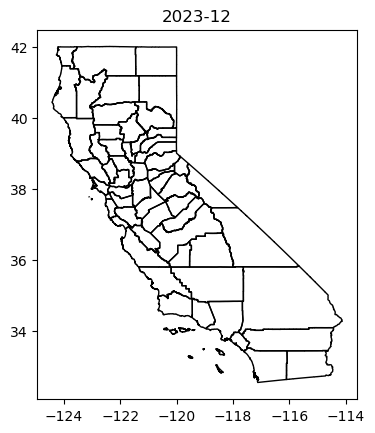

In [84]:
%matplotlib inline
# np.seterr(divide = 'ignore') 
month = 1
for year in range(2017, 2024):
    for month in range(1, 13):
        ax = world.plot(color = "none", edgecolor = 'black')
        if (len(dic[(year, month)]) > 0):
            fires_plot = dic[(year, month)]
            try:
                plt.scatter(fires_plot["Longitude"], fires_plot["Latitude"], c=np.log(fires_plot["AcresBurned"]), cmap="Reds", s=4)
            except:
                plt.scatter(fires_plot["Longitude"], fires_plot["Latitude"], color="red", s=4)
            
        plt.title(str(year) + "-" + str(month))
        plt.show()
        
        time.sleep(0.5)
        clear_output(wait=True)


    

In [ ]:
# while (month):
# #     choose = []
#     print("marker1")
#     scats = []
#     for i in range(2013, 2023):
#         ax[(i-2013)//5, (i+2)%5].set_title(i)
#         scat = ax[(i-2013)//5, (i+2)%5].scatter(dic[(i, month)]["Longitude"], dic[(i, month)]["Latitude"], s=10, color="red")
#         scats.append(scat)
# #         print("marker2") 
#     clear_output(wait=True)
#     fig.suptitle(month)
#     fig.canvas.draw()
#     fig.canvas.flush_events()
#     display(fig)
    
#     for i in range(2013, 2023):
#         scats[i].remove()
#     month += 1
#     if (month == 13):
#         month = 1